In [1]:
import osmnx as ox, pandas as pd, networkx as nx, time, geopandas as gpd, os, json
%matplotlib inline
ox.config(use_cache=True, log_file=True, log_console=True, log_filename='analyze_stats_every_us_city',
          data_folder='G:/Geoff/osmnx/cities-usa', cache_folder='G:/Geoff/osmnx/cache/cities-usa')

In [2]:
df = pd.read_csv('stats_every_city.csv', encoding='utf-8')
df.head()

,area,avg_circuity,avg_edge_length,avg_street_length,avg_streets_per_intersection,city,count_street_segments,counts_streets_per_intersection,edge_density_km,geoid,k_avg,m,n,node_density_km,proportion_streets_per_intersection,self_loop_proportion,state,time,total_edge_length,total_street_length
0,40255362,1.073271,194.510003,198.591402,2.639889,Abbeville,467,"{0: 0, 1: 88, 2: 0, 3: 236, 4: 29, 5: 7, 6: 1}",4285.897938,100124,4.914127,887,361,8.967749,"{0: 0.0, 1: 0.24376731301939059, 2: 0.0, 3: 0....",0.015784,AL,0.109376,172530.373000,92742.184895
1,65064935,1.064510,161.101650,165.761708,2.776014,Adamsville,741,"{0: 0, 1: 130, 2: 0, 3: 311, 4: 120, 5: 5, 6: 1}",3468.894764,100460,4.941799,1401,567,8.714371,"{0: 0.0, 1: 0.2292768959435626, 2: 0.0, 3: 0.5...",0.000000,AL,0.405688,225703.412346,122829.425353
2,9753292,1.056957,229.564790,228.519886,2.578431,Addison,123,"{0: 0, 1: 27, 2: 0, 3: 65, 4: 9, 5: 1}",5743.066921,100484,4.784314,244,102,10.458007,"{0: 0.0, 1: 0.2647058823529412, 2: 0.0, 3: 0.6...",0.008197,AL,0.078055,56013.808659,28107.945963
3,1776164,1.064785,111.877918,111.877918,2.933333,Akron,85,"{0: 0, 1: 14, 2: 0, 3: 22, 4: 24}",10708.046128,100676,5.666667,170,60,33.780664,"{0: 0.0, 1: 0.23333333333333334, 2: 0.0, 3: 0....",0.000000,AL,0.054039,19019.246043,9509.623021
4,65079075,1.085743,154.553216,156.323639,2.403846,Alabaster,1846,"{0: 0, 1: 532, 2: 2, 3: 900, 4: 117, 5: 8, 6: 1}",8399.853922,100820,4.534615,3537,1560,23.970839,"{0: 0.0, 1: 0.34102564102564104, 2: 0.00128205...",0.002827,AL,0.960674,546654.723408,288573.436959


## Inspect the stats

In [10]:
len(df)

19655

In [3]:
df.describe()

,area,avg_circuity,avg_edge_length,avg_street_length,avg_streets_per_intersection,count_street_segments,edge_density_km,geoid,k_avg,m,n,node_density_km,self_loop_proportion,time,total_edge_length,total_street_length
count,1.965500e+04,19651.000000,19655.000000,19655.000000,19655.000000,19655.000000,19655.000000,1.965500e+04,19655.000000,19655.000000,19655.000000,19655.000000,19655.000000,19655.000000,1.965500e+04,1.965500e+04
mean,1.669234e+07,1.067426,149.621104,150.756170,2.887263,685.166624,13449.037817,2.998137e+06,5.355798,1289.136505,485.649453,40.814650,0.005738,0.245441,1.706794e+05,9.207097e+04
std,1.074611e+08,0.154330,78.170358,78.488418,0.276514,2997.778519,7472.601654,1.460797e+06,0.632478,5399.408940,2054.418637,30.397090,0.018662,0.902459,6.559219e+05,3.707478e+05
min,3.903300e+04,1.000000,5.485503,5.485503,1.000000,1.000000,24.764459,1.001240e+05,2.000000,2.000000,1.000000,0.043802,0.000000,0.000000,6.001362e+01,3.000681e+01
25%,1.614248e+06,1.035627,111.269710,111.888577,2.700000,67.000000,7902.431070,1.845495e+06,4.941176,133.000000,50.000000,19.429587,0.000000,0.040038,1.835416e+04,9.272522e+03
50%,3.916104e+06,1.057057,133.201741,134.163224,2.888889,159.000000,12375.442837,2.933760e+06,5.352941,312.000000,114.000000,33.972554,0.000000,0.066087,4.297917e+04,2.205734e+04
75%,1.157791e+07,1.084291,162.939121,164.763777,3.083333,459.000000,17822.177170,4.176050e+06,5.808906,889.500000,327.500000,54.804784,0.007265,0.184752,1.218119e+05,6.353654e+04
max,7.434258e+09,20.452465,2053.573083,2053.573083,5.752475,173517.000000,58603.420737,5.686665e+06,8.158416,301483.000000,119164.000000,725.602897,1.000000,42.707164,3.023726e+07,1.793120e+07


In [4]:
df[['state', 'city', 'time', 'k_avg', 'n', 'm', 'avg_circuity']].sort_values(by='m', ascending=False).head()

,state,city,time,k_avg,n,m,avg_circuity
17202,TX,Houston,42.707164,5.059968,119164,301483,1.082759
3551,IL,Chicago,26.280314,5.749280,66281,190534,1.022414
1437,CA,Los Angeles,32.258096,5.601961,67124,188013,1.050530
658,AZ,Phoenix,30.115757,5.335597,60966,162645,1.079411
11855,NY,New York,25.406152,5.211918,61321,159800,1.031475


In [5]:
df.groupby('state').median().describe()

,area,avg_circuity,avg_edge_length,avg_street_length,avg_streets_per_intersection,count_street_segments,edge_density_km,geoid,k_avg,m,n,node_density_km,self_loop_proportion,time,total_edge_length,total_street_length
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01
mean,1.656635e+07,1.063303,135.582026,136.501073,2.855373,967.705882,12588.932862,2.937897e+06,5.306803,1781.647059,655.735294,37.066973,0.002877,0.316732,2.006603e+05,1.101855e+05
std,2.990098e+07,0.014995,23.421233,23.660292,0.166845,3776.451868,4823.018673,1.583990e+06,0.350028,6742.707562,2420.215152,19.172511,0.003575,1.079786,6.265290e+05,3.566154e+05
min,1.070451e+06,1.040440,92.052805,93.627253,2.430484,52.000000,1052.176568,1.400720e+05,4.537493,104.000000,42.000000,2.183017,0.000000,0.031251,1.906431e+04,9.532157e+03
25%,2.774133e+06,1.051353,118.615061,119.380450,2.737268,122.500000,8989.315780,1.693652e+06,5.088383,240.000000,90.750000,22.106904,0.000000,0.060920,3.248890e+04,1.716195e+04
50%,5.069211e+06,1.060878,129.847001,132.090154,2.827720,173.000000,12397.015361,2.939966e+06,5.253286,320.000000,126.500000,33.230799,0.001964,0.076689,4.962722e+04,2.585387e+04
75%,1.219045e+07,1.073522,153.349019,155.727451,2.957282,282.000000,15302.372387,4.194328e+06,5.488620,545.500000,207.500000,48.007393,0.004032,0.096794,7.806380e+04,4.094843e+04
max,1.583650e+08,1.106149,191.889107,190.854611,3.200000,26934.000000,27931.763215,5.643092e+06,6.117647,48053.000000,17222.000000,108.748782,0.017385,7.656312,4.423413e+06,2.521756e+06


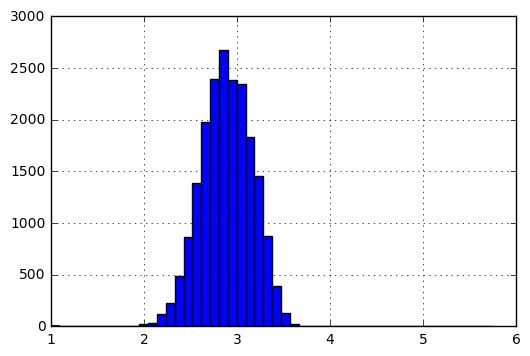

In [6]:
df['avg_streets_per_intersection'].hist(bins=50)

In [7]:
df.groupby('state')['avg_streets_per_intersection'].median().sort_values()

state
HI    2.430484
AK    2.476190
VT    2.623762
VA    2.673469
WV    2.687860
AL    2.694864
NC    2.700031
ME    2.711472
UT    2.717072
KY    2.719481
OR    2.728280
NH    2.732475
CT    2.734992
TN    2.739544
CA    2.748803
MS    2.774388
NV    2.779306
DE    2.788000
NY    2.788462
AZ    2.791969
AR    2.792630
MA    2.796719
GA    2.812500
LA    2.815530
MD    2.821429
WI    2.827720
WA    2.833333
SC    2.851999
RI    2.872540
OH    2.880184
FL    2.893646
NJ    2.895288
MI    2.914286
MO    2.916667
MN    2.920000
PA    2.928571
TX    2.938630
ID    2.954545
CO    2.960018
NM    2.961823
IL    2.962963
IN    2.985714
WY    3.000000
IA    3.043478
OK    3.084524
ND    3.104000
SD    3.121212
DC    3.144989
NE    3.173077
KS    3.175097
MT    3.200000
Name: avg_streets_per_intersection, dtype: float64

In [8]:
# node and edge density per km are hard to interpret when using municipal boundaries
# as municipal boundaries vary greatly in their extents around the built-up area
df.groupby('state')['node_density_km'].median().sort_values()

state
AK      2.183017
ME     11.312598
AL     12.302345
AZ     17.596706
UT     17.839947
TN     18.141125
HI     18.620645
NV     18.827410
GA     18.912030
MS     18.932747
NH     19.658830
AR     20.110052
LA     21.748671
SC     22.465138
NC     25.830959
WI     26.840748
MN     27.200307
NY     29.454363
TX     29.638208
NM     29.672285
VT     29.913788
MI     30.145066
IA     32.830616
WY     32.871492
DE     33.059256
KY     33.230799
FL     34.608365
OK     35.419974
IL     37.660466
CT     37.717869
SD     38.691486
VA     39.189647
OH     39.659715
MO     40.012516
CO     44.849424
WV     45.099964
MA     47.213091
WA     47.983049
ND     48.031737
IN     48.100255
ID     48.198548
CA     49.999939
PA     53.881898
MD     54.944034
OR     56.050583
NJ     57.695087
KS     59.195116
MT     70.540797
NE     73.066832
RI     74.517315
DC    108.748782
Name: node_density_km, dtype: float64

In [9]:
df[df['state']=='AZ'][['node_density_km', 'city']].sort_values(by='node_density_km')

,node_density_km,city
631,1.385669,Gila Bend
677,2.691958,Star Valley
608,3.055237,Buckeye
687,3.128989,Wellton
680,3.487160,Taylor
686,3.603409,Tusayan
626,3.778062,Eloy
690,3.902509,Williams
615,4.368459,Chino Valley
654,4.585435,Parker
